<a href="https://colab.research.google.com/github/DamodaraBarbosa/xbox_game_pass_analisys/blob/main/Date_analysis_Xbox_Game_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
sns.set()

Parâmetros para o matplotlib.pyplot

In [55]:
plt.rcParams['figure.figsize'] = (16, 12)
parametros = {'axes.labelsize': 16, 'axes.titlesize': 18}
plt.rcParams.update(parametros)

Importando os dados do Xbox Game Pass

In [56]:
gamepass = pd.read_csv('/content/drive/MyDrive/Dados Xbox/data_gamepass.csv')

In [57]:
gamepass.head()

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,addons,ta_score,gamerscore,ratio,gamers,comp_%,comp_time,rating,metascore,userscore
0,PERSONA 3 PORTABLE,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,Role-Playing,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,PERSONA 4 GOLDEN,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,NaN,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,HIGH ON LIFE,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,First-Person Shooter,NaN,NaN,M,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,HELLO NEIGHBOR 2,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,Strategy / Puzzle,Dynamic Pixels,TinyBuild,E10+,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,WARHAMMER 40000 DARKTIDE,Xbox / PC,Coming Soon,NaN,2022-11-01,NaN,Action,Fatshark,Fatshark,RP,...,['Optimized for Xbox Series X/S'],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [58]:
gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          1197 non-null   object 
 1   system        1196 non-null   object 
 2   status        1196 non-null   object 
 3   release_date  753 non-null    object 
 4   added         1197 non-null   object 
 5   removed       646 non-null    object 
 6   genre         1192 non-null   object 
 7   developer     733 non-null    object 
 8   publisher     733 non-null    object 
 9   esrb          678 non-null    object 
 10  esrb content  594 non-null    object 
 11  addons        733 non-null    object 
 12  ta_score      906 non-null    float64
 13  gamerscore    906 non-null    float64
 14  ratio         905 non-null    float64
 15  gamers        926 non-null    float64
 16  comp_%        926 non-null    float64
 17  comp_time     846 non-null    float64
 18  rating        864 non-null  

# Tratamentos para as datas

In [59]:
# os dados das colunas release date, added e removed devem ser convertidos para datetime:

gamepass['release_date'] = pd.to_datetime(gamepass['release_date'])
gamepass['added'] = pd.to_datetime(gamepass['added'])
gamepass['removed'] = pd.to_datetime(gamepass['removed'])

In [60]:
gamepass.dtypes

game                    object
system                  object
status                  object
release_date    datetime64[ns]
added           datetime64[ns]
removed         datetime64[ns]
genre                   object
developer               object
publisher               object
esrb                    object
esrb content            object
addons                  object
ta_score               float64
gamerscore             float64
ratio                  float64
gamers                 float64
comp_%                 float64
comp_time              float64
rating                 float64
metascore              float64
userscore              float64
dtype: object

## Definindo novas colunas derivadas dos dados da base

In [61]:
# coluna com o tempo em dias que os jogos levaram para serem adicionados ao Game Pass após o seu lançamento:

gamepass['insert_time'] = (gamepass['added'] - gamepass['release_date']).dt.days

In [62]:
# coluna com o tempo em dias para que os jogos fossem removidos do serviço:

gamepass['remove_time'] = (gamepass['removed'] - gamepass['added']).dt.days

In [63]:
# coluna com o mês em que os jogos foram inseridos no Game Pass:

gamepass['insert_month'] = gamepass['added'].dt.month

In [64]:
# coluna com o mês em que os jogos foram removidos do Game Pass:

gamepass['remove_month'] = gamepass['removed'].dt.month

In [65]:
 # coluna com o ano em que os jogos foram inseridos no Game Pass:

gamepass['insert_year'] = gamepass['added'].dt.year

In [66]:
# coluna com o ano em que os jogos foram removidos do Game Pass:

gamepass['remove_year'] = gamepass['removed'].dt.year

In [67]:
# visualizando o dataframe:

gamepass

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,comp_time,rating,metascore,userscore,insert_time,remove_time,insert_month,remove_month,insert_year,remove_year
0,PERSONA 3 PORTABLE,Xbox / PC,Coming Soon,NaT,2023-01-01,NaT,Role-Playing,Atlus,Sega,M,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2023,NaN
1,PERSONA 4 GOLDEN,Xbox / PC,Coming Soon,NaT,2023-01-01,NaT,NaN,Atlus,Sega,M,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2023,NaN
2,HIGH ON LIFE,Xbox / PC,Coming Soon,NaT,2022-12-01,NaT,First-Person Shooter,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,2022,NaN
3,HELLO NEIGHBOR 2,Xbox / PC,Coming Soon,NaT,2022-12-01,NaT,Strategy / Puzzle,Dynamic Pixels,TinyBuild,E10+,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,2022,NaN
4,WARHAMMER 40000 DARKTIDE,Xbox / PC,Coming Soon,NaT,2022-11-01,NaT,Action,Fatshark,Fatshark,RP,...,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,STRIDER,Xbox,Removed,2014-02-19,2017-06-01,2018-03-01,Platformer / Action-Adventure,Double Helix Games,Capcom,NaN,...,13.5,3.7,76.0,7.0,1198.0,273.0,6,3.0,2017,2018.0
1193,VIRTUA FIGHTER 5 FINAL SHOWDOWN,Xbox,Removed,2012-06-06,2017-06-01,2018-03-01,Fighting,Sega AM2,Sega,NaN,...,1.5,3.1,81.0,7.9,1821.0,273.0,6,3.0,2017,2018.0
1194,WWE 2K16,Xbox,Removed,2015-10-27,2017-06-01,2018-01-01,Wrestling,Yuke's/Visual Concepts,2K Sports,NaN,...,175.0,3.2,72.0,5.4,583.0,214.0,6,1.0,2017,2018.0
1195,NBA 2K16,Xbox,Removed,2015-09-25,2017-06-01,2017-12-01,Sports / Basketball,Visual Concepts,2K Sports,NaN,...,200.0,3.9,86.0,6.2,615.0,183.0,6,12.0,2017,2017.0


# Análises 

## Anos

### Inserções e remoções no serviço em cada ano

In [68]:
# quantidade de jogos adicionados por ano:

games_insert_per_year = gamepass['insert_year'].value_counts()
games_insert_per_year

2021    266
2020    264
2019    205
2022    181
2017    163
2018    116
2023      2
Name: insert_year, dtype: int64

In [69]:
games_insert_per_year.describe()

count      7.000000
mean     171.000000
std       91.815031
min        2.000000
25%      139.500000
50%      181.000000
75%      234.500000
max      266.000000
Name: insert_year, dtype: float64

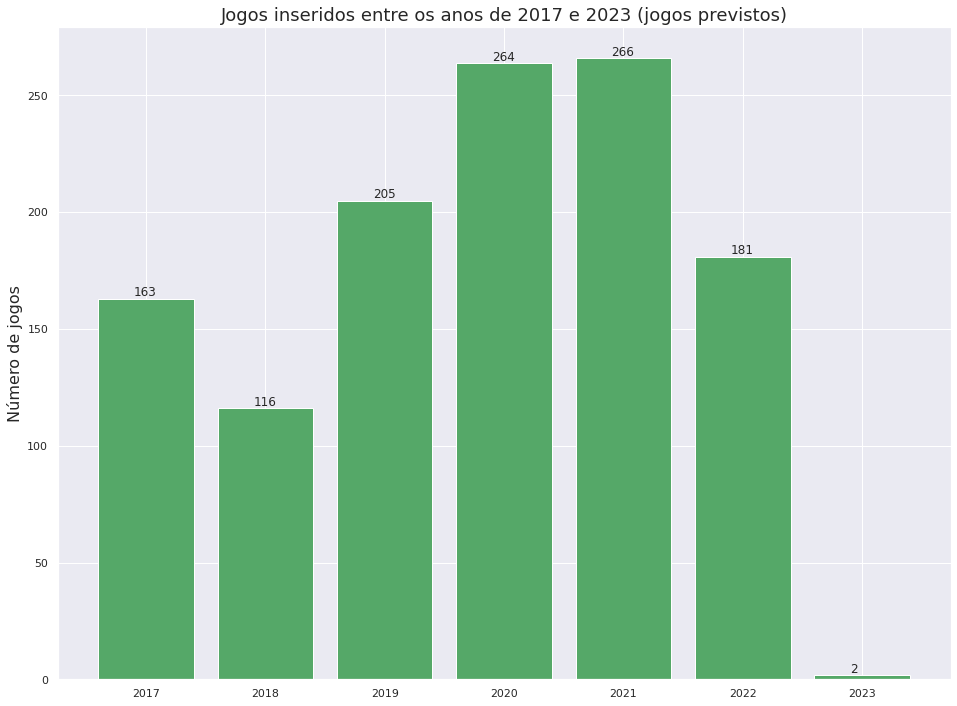

In [70]:
bars = plt.bar(games_insert_per_year.keys(), games_insert_per_year.values, color= 'g')

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.3, value + 1, value)

plt.title('Jogos inseridos entre os anos de 2017 e 2023 (jogos previstos)')
plt.ylabel('Número de jogos')
plt.show()

In [71]:
# média, mediana para os jogos inseridos por ano:

pd.DataFrame({'Média': games_insert_per_year.mean(),
              'Mediana': games_insert_per_year.median()},
             index= [0])

,Média,Mediana
0,171.0,181.0


In [72]:
# desvio médio, variância e desvio padrão:

pd.DataFrame({'Desvio padrão': games_insert_per_year.std(),
              'Desvio médio': games_insert_per_year.mad(),
              'Variância': games_insert_per_year.var()},
             index= [0])

,Desvio padrão,Desvio médio,Variância
0,91.815031,66.285714,8430.0


In [73]:
# quantidade de jogos removidos por ano:

games_removed_per_year = gamepass['remove_year'].value_counts()
games_removed_per_year

2021.0    179
2022.0    137
2020.0    134
2019.0    115
2018.0     79
2017.0      2
Name: remove_year, dtype: int64

In [74]:
games_removed_per_year.describe()

count      6.000000
mean     107.666667
std       61.128280
min        2.000000
25%       88.000000
50%      124.500000
75%      136.250000
max      179.000000
Name: remove_year, dtype: float64

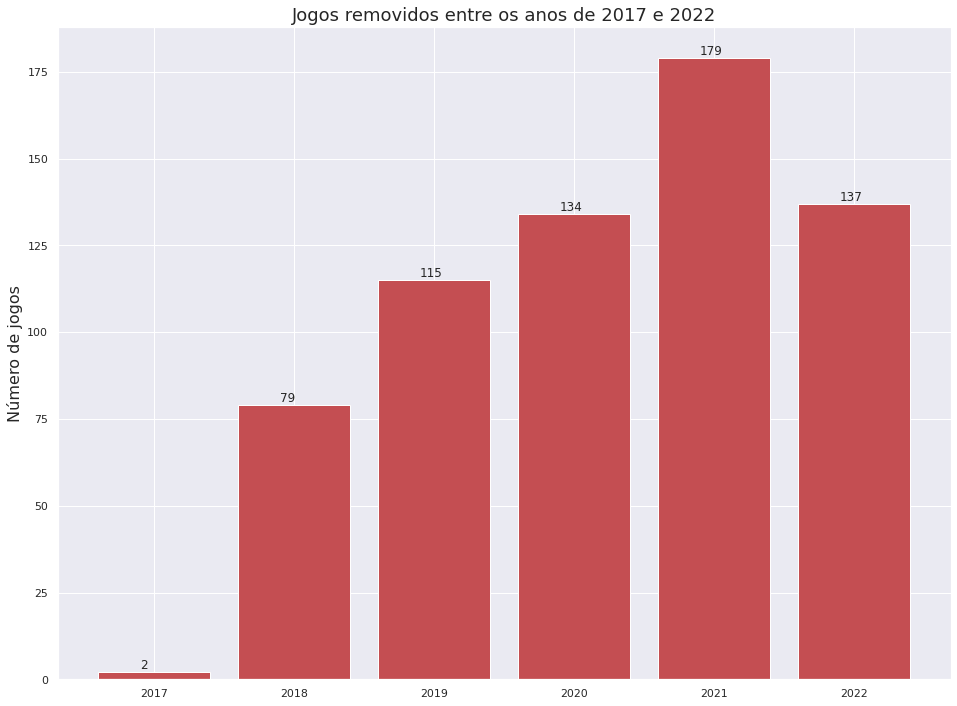

In [75]:
bars = plt.bar(games_removed_per_year.keys(), games_removed_per_year.values, color= 'r')

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.3, value + 1, value)

plt.title('Jogos removidos entre os anos de 2017 e 2022')
plt.ylabel('Número de jogos')
plt.show()

### Perfil dos jogos que entraram em cada ano

Média de jogadores dos jogos inseridos e removidos em cada ano

In [76]:
# a média de jogadores dos jogos inseridos para cada ano:

mean_gamers_insert_games_per_year = gamepass.groupby('insert_year')['gamers'].mean()
mean_gamers_insert_games_per_year

insert_year
2017    74455.165563
2018    88153.923077
2019    73202.515924
2020    72134.715000
2021    44510.983871
2022    33644.833333
2023        0.000000
Name: gamers, dtype: float64

In [77]:
# média de jogadores dos jogos removidos para cada ano:

mean_gamers_removed_games_per_year = gamepass.query('status == "Removed"').groupby('remove_year')['gamers'].mean()
mean_gamers_removed_games_per_year

remove_year
2017.0    37758.000000
2018.0    47011.133333
2019.0    52263.871287
2020.0    62984.695238
2021.0    47623.456693
2022.0    41901.894737
Name: gamers, dtype: float64

In [78]:
(mean_gamers_insert_games_per_year.values[:-1] / 1000)

array([74.45516556, 88.15392308, 73.20251592, 72.134715  , 44.51098387,
       33.64483333])

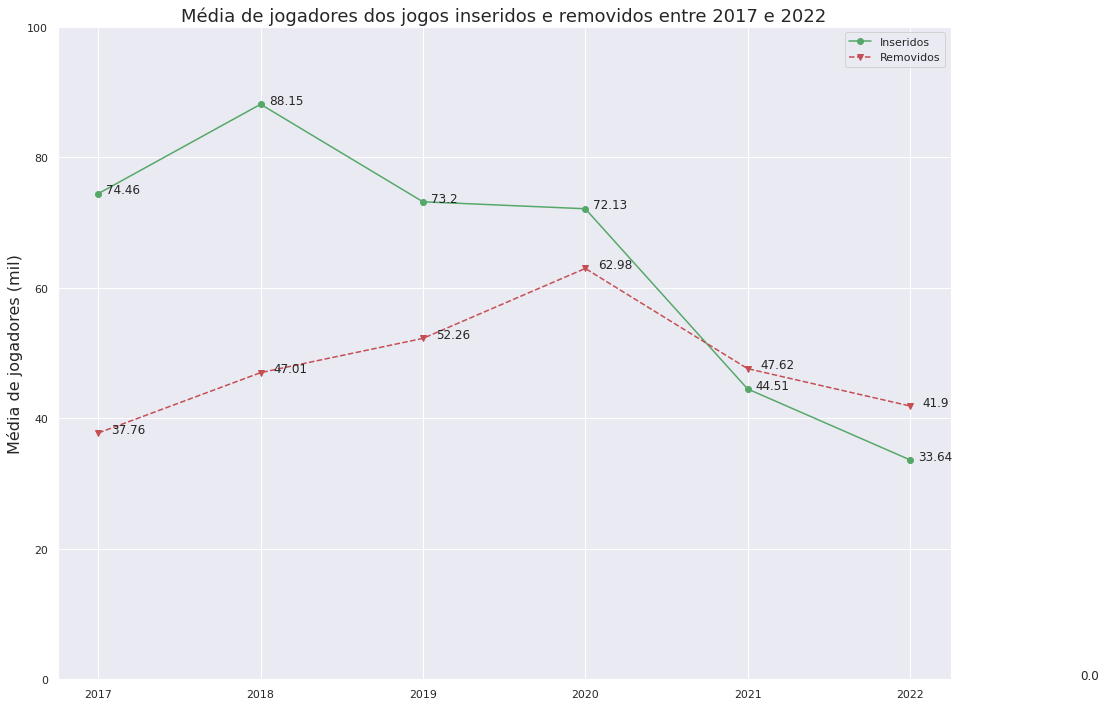

In [79]:
# plotando o gráfico para mostrar a tendências dos perfis de jogos adicionados e removidos do serviço:

plt.plot(mean_gamers_insert_games_per_year.keys()[:-1],
         (mean_gamers_insert_games_per_year.values[:-1] / 1000), 
         color= 'g', marker= 'o')
plt.plot(mean_gamers_removed_games_per_year.keys(),
         (mean_gamers_removed_games_per_year.values / 1000),
         color= 'r', marker= 'v', linestyle= '--')

for index in range(len(mean_gamers_insert_games_per_year)):
  plt.text(
      mean_gamers_insert_games_per_year.keys()[index] + 0.05,
      mean_gamers_insert_games_per_year.values[index] / 1000,
      round(mean_gamers_insert_games_per_year.values[index] / 1000, 2)
  )
for index in range(len(mean_gamers_removed_games_per_year)):
  plt.text(
      mean_gamers_removed_games_per_year.keys()[index] + 0.08,
      mean_gamers_removed_games_per_year.values[index] / 1000,
      round(mean_gamers_removed_games_per_year.values[index] / 1000, 2)
  )
plt.title('Média de jogadores dos jogos inseridos e removidos entre 2017 e 2022')
plt.legend(['Inseridos', 'Removidos'])
plt.ylabel('Média de jogadores (mil)')
plt.ylim([0, 100])
plt.show()

### Perfil das notas do Metacritic para os jogos inseridos e removidos em cada ano

In [80]:
# média da avaliação no Metacritic dos jogos inseridos entre 2017 e 2022:

mean_metascore_insert_games_per_year = gamepass.groupby('insert_year')['metascore'].mean()
mean_metascore_insert_games_per_year

insert_year
2017    76.204082
2018    75.312500
2019    77.484848
2020    77.630872
2021    76.407407
2022    77.383721
2023          NaN
Name: metascore, dtype: float64

In [81]:
# média da avaliação no Metacritic dos jogos removidos entre 2017 e 2022:

mean_metascore_removed_games_per_year = gamepass.groupby('remove_year')['metascore'].mean()
mean_metascore_removed_games_per_year

remove_year
2017.0    81.500000
2018.0    73.756757
2019.0    76.020619
2020.0    76.724138
2021.0    77.591837
2022.0    77.635294
Name: metascore, dtype: float64

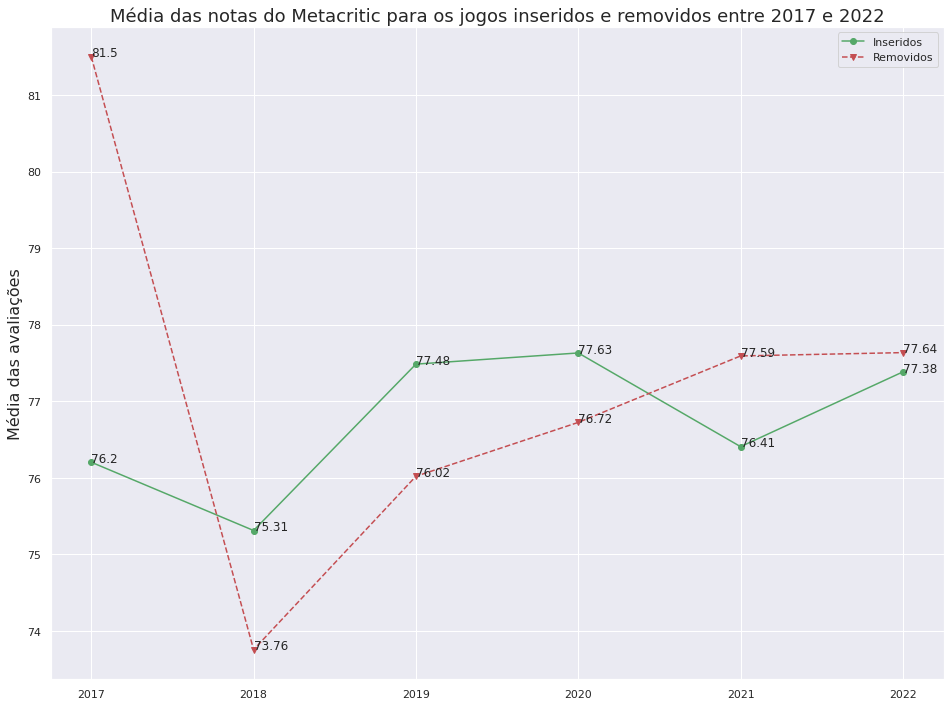

In [82]:
plt.plot(mean_metascore_insert_games_per_year[:-1], color= 'g', marker= 'o')
plt.plot(mean_metascore_removed_games_per_year, color= 'r', marker= 'v', linestyle= '--')

for index in range(len(mean_metascore_insert_games_per_year)):
  plt.text(
      mean_metascore_insert_games_per_year.keys()[index],
      mean_metascore_insert_games_per_year.values[index],
      round(mean_metascore_insert_games_per_year.values[index], 2)
  )
for index in range(len(mean_metascore_removed_games_per_year)):
  plt.text(
      mean_metascore_removed_games_per_year.keys()[index],
      mean_metascore_removed_games_per_year.values[index],
      round(mean_metascore_removed_games_per_year.values[index], 2)
  )

plt.title('Média das notas do Metacritic para os jogos inseridos e removidos entre 2017 e 2022')
plt.legend(['Inseridos', 'Removidos'])
plt.ylabel('Média das avaliações')
plt.show()

### As publishers com mais jogos inseridos e removidos em cada ano

Para o ano de 2017

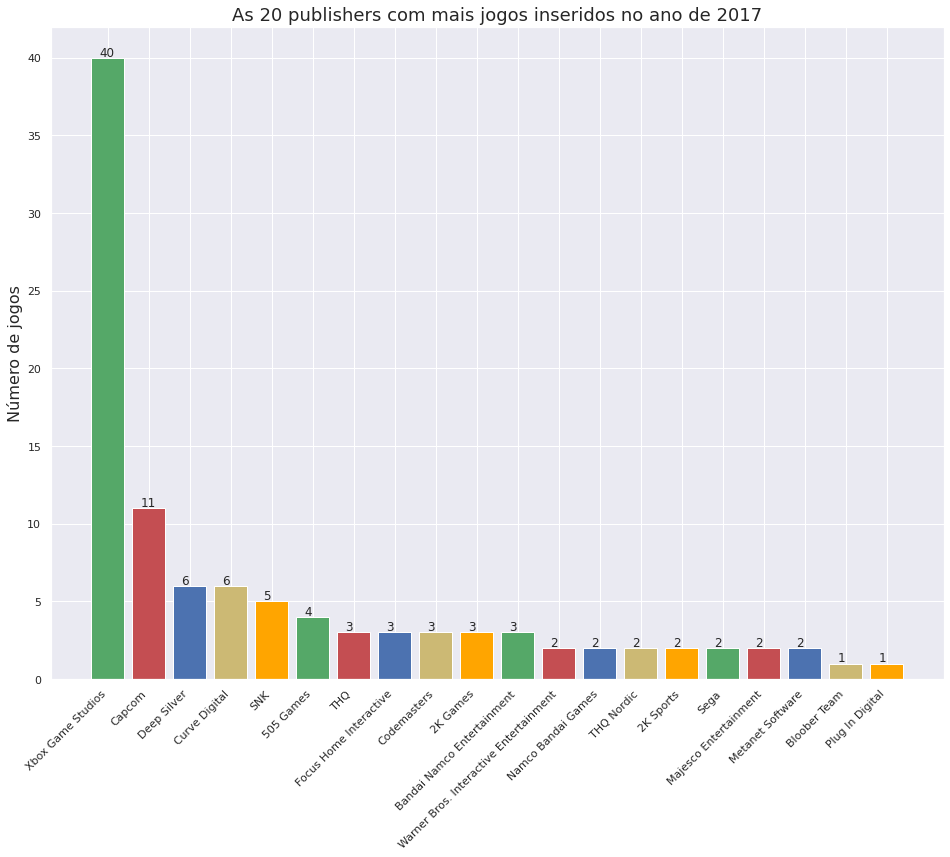

In [95]:
# o ano de 2017 é o ano de nascimento do Xbox Game Pass, e nele apenas dois jogos foram removidos durante todo o ano. Portanto, a análise das publishers
# para os jogos removidos não faz tanto sentido.

bars = plt.bar(gamepass.query('insert_year == 2017').value_counts('publisher').keys()[:20], 
        gamepass.query('insert_year == 2017').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos inseridos no ano de 2017')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

In [ ]:
# Faz sentido que a publisher com mais jogos adicionados ao Xbox Game Pass no ano de 2017 seja justamente a Xbox Game Studios. O serviço, estreante naquele ano,
# trouxe um novo modelo de negócios para o universos dos games. Portanto, ainda precisava se provar no setor e, talvez, ainda houvesse desconfiança das 3rd partys.

In [96]:
# quanto aos jogos removidos:

gamepass.query('remove_year == 2017')

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,comp_time,rating,metascore,userscore,insert_time,remove_time,insert_month,remove_month,insert_year,remove_year
1195,NBA 2K16,Xbox,Removed,2015-09-25,2017-06-01,2017-12-01,Sports / Basketball,Visual Concepts,2K Sports,NaN,...,200.0,3.9,86.0,6.2,615.0,183.0,6,12.0,2017,2017.0
1196,DUNGEONS DRAGONS CHRONICLES OF MYSTARA,Xbox,Removed,2013-06-19,2017-06-01,2017-08-01,Action / Role-Playing / Brawler / Action-Adven...,NaN,NaN,NaN,...,13.5,3.7,77.0,5.9,1443.0,61.0,6,8.0,2017,2017.0


Para o ano de 2018

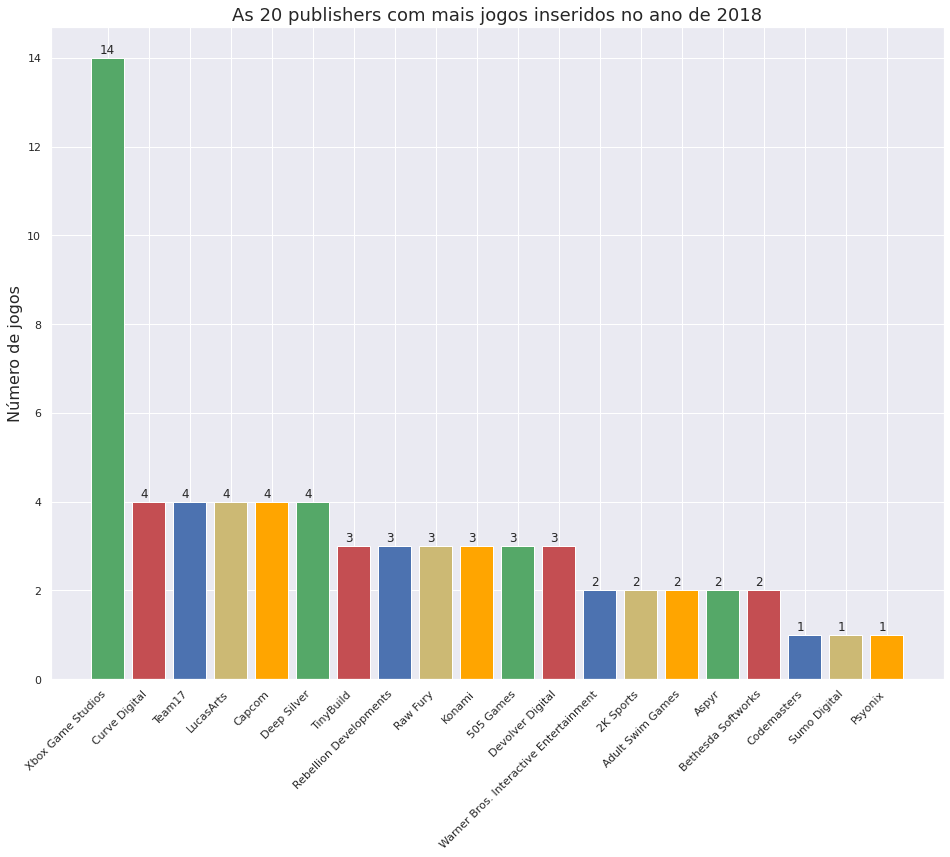

In [97]:
# para os jogos inseridos:

bars = plt.bar(gamepass.query('insert_year == 2018').value_counts('publisher').keys()[:20], 
        gamepass.query('insert_year == 2018').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos inseridos no ano de 2018')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

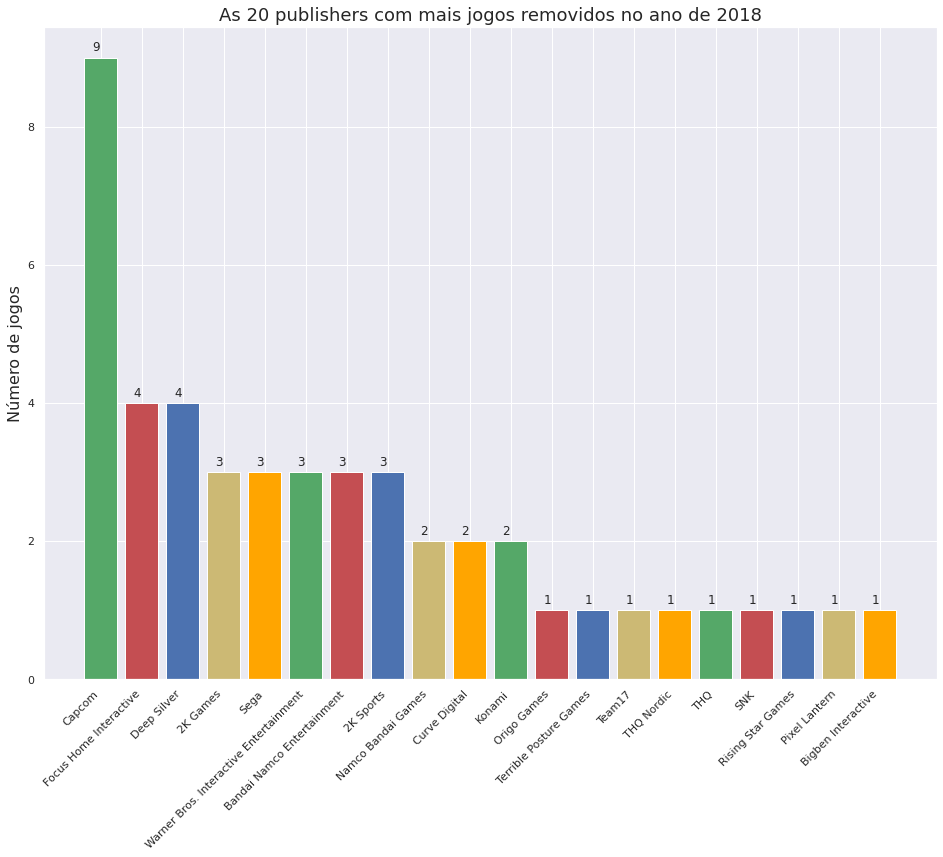

In [98]:
# para os jogos removidos:

bars = plt.bar(gamepass.query('remove_year == 2018').value_counts('publisher').keys()[:20], 
        gamepass.query('remove_year == 2018').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos removidos no ano de 2018')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

Para o ano de 2019

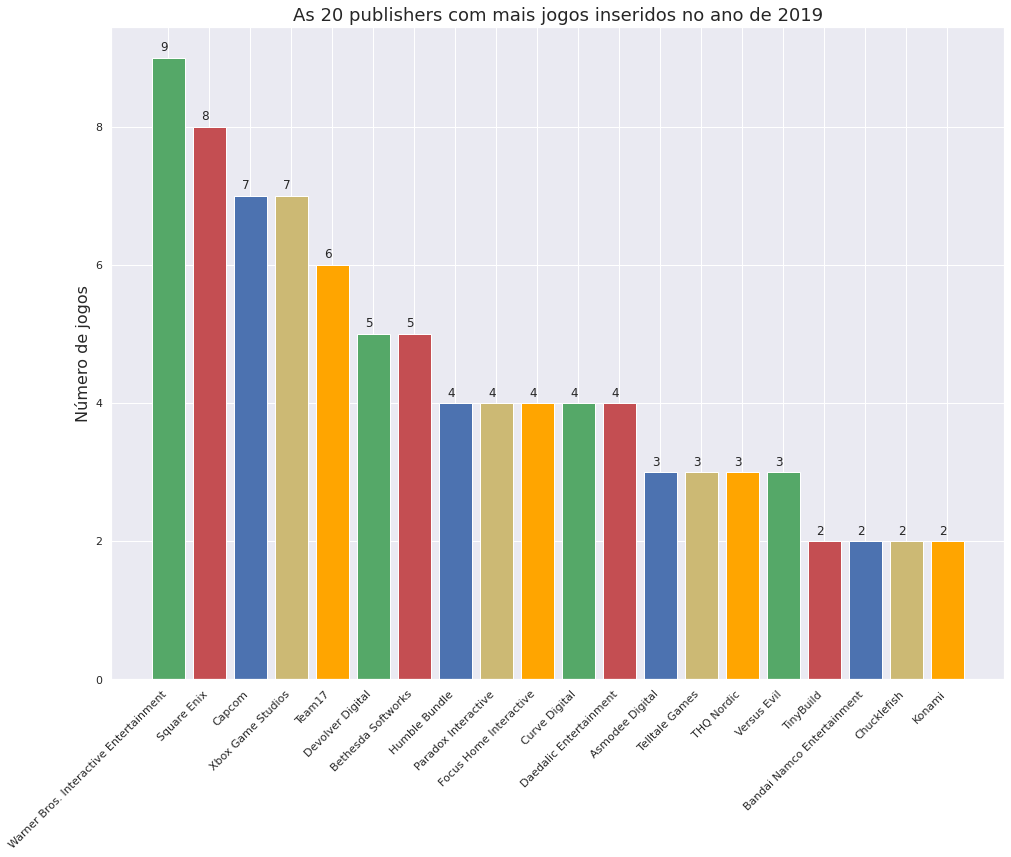

In [101]:
# para os jogos inseridos:

bars = plt.bar(gamepass.query('insert_year == 2019').value_counts('publisher').keys()[:20], 
        gamepass.query('insert_year == 2019').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos inseridos no ano de 2019')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

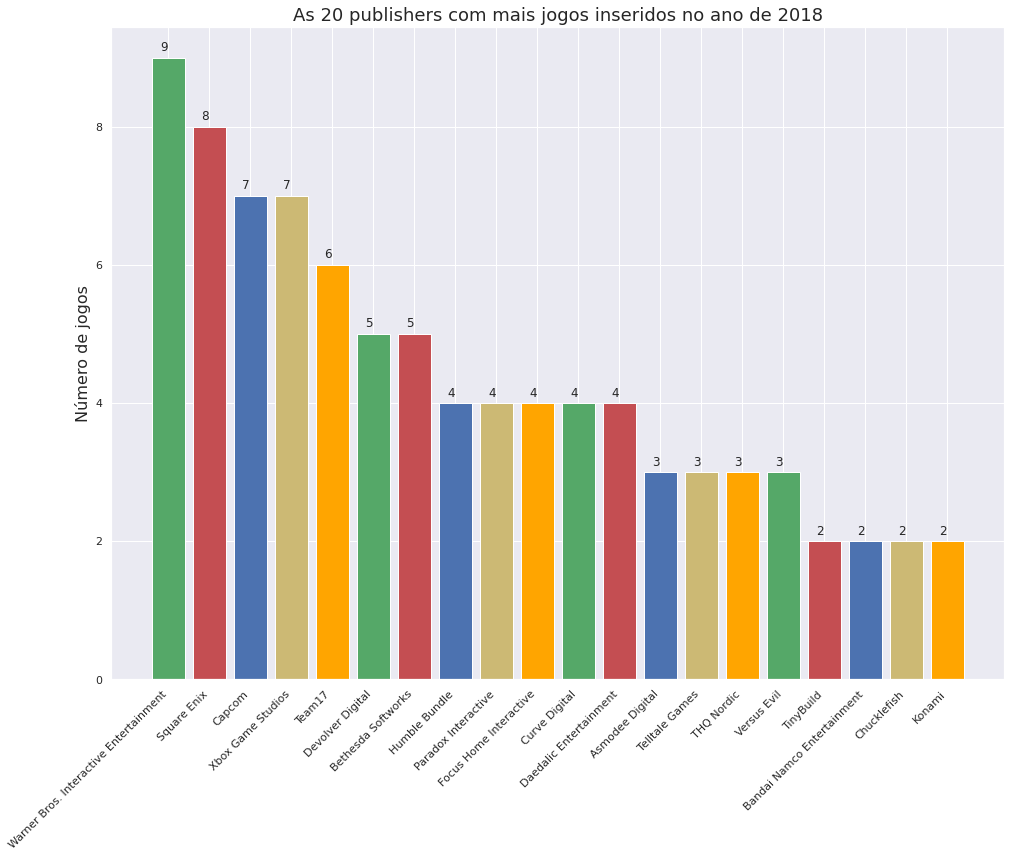

In [100]:
# para os jogos removidos:

bars = plt.bar(gamepass.query('insert_year == 2019').value_counts('publisher').keys()[:20], 
        gamepass.query('insert_year == 2019').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos inseridos no ano de 2019')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

Para o ano de 2020

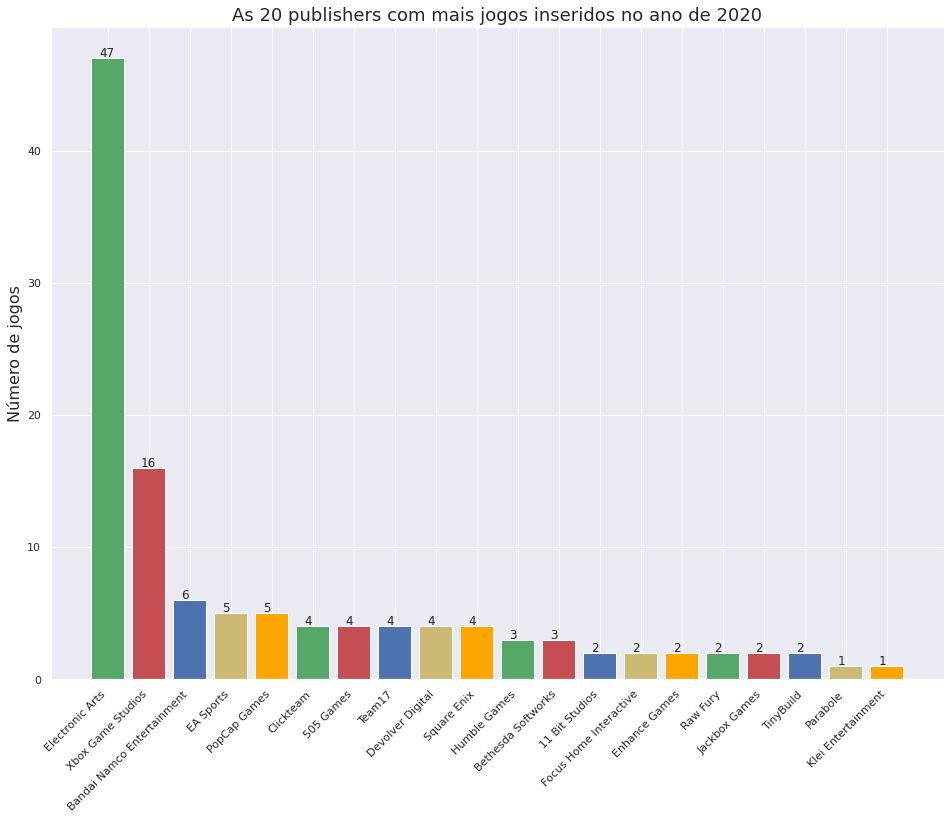

In [102]:
# para os jogos inseridos:

bars = plt.bar(gamepass.query('insert_year == 2020').value_counts('publisher').keys()[:20], 
        gamepass.query('insert_year == 2020').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos inseridos no ano de 2020')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

In [ ]:
# No fim de 2020 o serviço de assinatura EA Play é adicionado ao Xbox Game Pass na modalidade Ultimate. Por isso, o grande volume de jogos da EA.

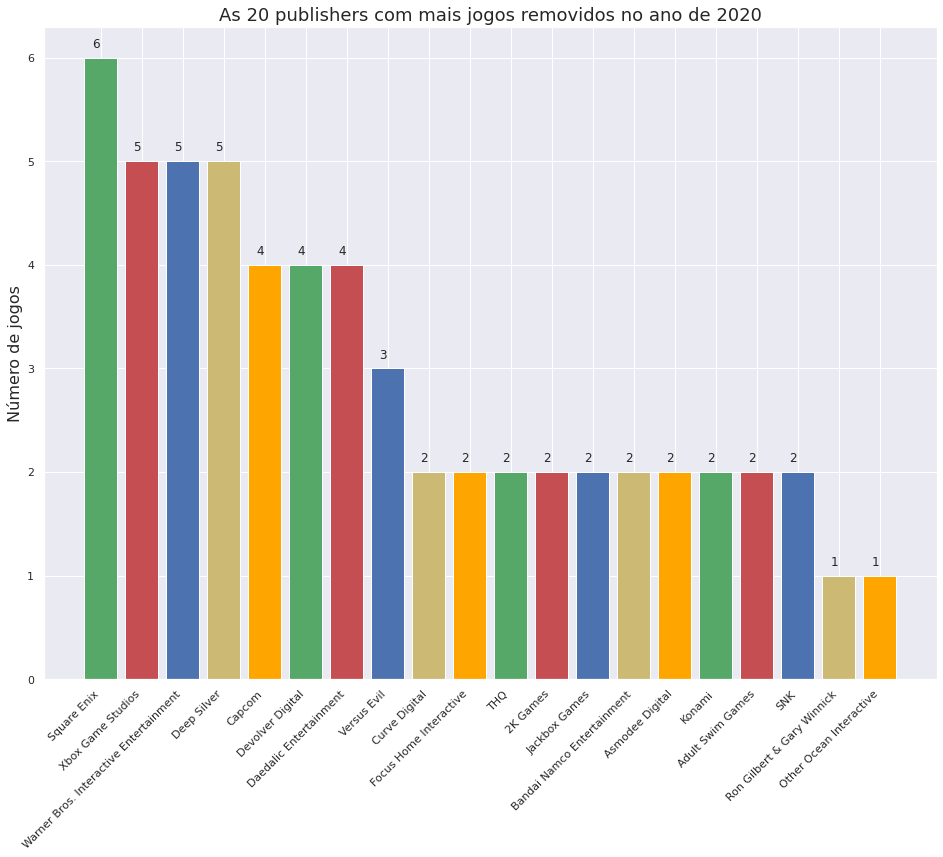

In [103]:
# para os jogos removidos:

bars = plt.bar(gamepass.query('remove_year == 2020').value_counts('publisher').keys()[:20], 
        gamepass.query('remove_year == 2020').value_counts('publisher').values[:20],
        color= ['g', 'r', 'b', 'y', 'orange'])

for bar in bars:
  value = bar.get_height()
  plt.text(bar.get_x() + 0.2, value + 0.1, value)

plt.title('As 20 publishers com mais jogos removidos no ano de 2020')
plt.ylabel('Número de jogos')
plt.xticks(rotation= '45', ha= 'right')
plt.show()

## Notas

Durante a pandemia da COVID-19 a indústria de games apresentou grandes ganhos, segundo pesquisa da SuperData, entre os anos de 2020 e 2021 houve crescimento de 12% nas receitas do setor. Durante o mesmo período também foi registrado o aumento de 14% nos lucros do setor de jogos. Fonte: https://adrenaline.com.br/noticias/v/71649/setor-de-games-tem-crescimento-de-12-entre-2020-e-2021

A base de usuários do Xbox Game Pass também saltou de 10 milhões de assinantes em 2020[1] para 25 milhões segundo reportado no início deste ano (2022)[2]. Fonte:[1] https://tecnoblog.net/noticias/2020/04/30/xbox-game-pass-chega-a-10-milhoes-de-assinantes/, [2]https://www.tecmundo.com.br/voxel/232210-xbox-game-pass-alcanca-25-milhoes-assinantes.htm